In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv("./Data2/2008-2009.csv")

In [3]:
# df

In [4]:
import os

path = "./Data2/"
dir_list = os.listdir(path)
allData = [file for file in dir_list if "-" in file and ".csv" in file]
df = pd.DataFrame()

for file in allData:
    pathFile = os.path.join(path,file)
    data = pd.read_csv(pathFile,error_bad_lines=False)
    try:
        df = df.append(data[["HomeTeam","AwayTeam","FTR","B365H","B365D","B365A","Date"]])
    except:
        continue
df

b'Skipping line 337: expected 57 fields, saw 62\nSkipping line 338: expected 57 fields, saw 62\nSkipping line 339: expected 57 fields, saw 62\nSkipping line 340: expected 57 fields, saw 62\nSkipping line 341: expected 57 fields, saw 62\nSkipping line 342: expected 57 fields, saw 62\nSkipping line 343: expected 57 fields, saw 62\nSkipping line 344: expected 57 fields, saw 62\nSkipping line 345: expected 57 fields, saw 62\nSkipping line 346: expected 57 fields, saw 62\nSkipping line 347: expected 57 fields, saw 62\nSkipping line 348: expected 57 fields, saw 62\nSkipping line 349: expected 57 fields, saw 62\nSkipping line 350: expected 57 fields, saw 62\nSkipping line 351: expected 57 fields, saw 62\nSkipping line 352: expected 57 fields, saw 62\nSkipping line 353: expected 57 fields, saw 62\nSkipping line 354: expected 57 fields, saw 62\nSkipping line 355: expected 57 fields, saw 62\nSkipping line 356: expected 57 fields, saw 62\nSkipping line 357: expected 57 fields, saw 62\nSkipping li

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Date
0,Blackburn,Sunderland,D,1.727,3.25,4.333,17/08/2002
1,Charlton,Chelsea,A,2.800,3.25,2.200,17/08/2002
2,Everton,Tottenham,D,2.250,3.25,2.750,17/08/2002
3,Fulham,Bolton,H,1.727,3.25,4.333,17/08/2002
4,Leeds,Man City,H,1.667,3.40,4.500,17/08/2002
...,...,...,...,...,...,...,...
179,West Ham,West Brom,H,1.570,4.20,5.500,19/01/2021
180,Leicester,Chelsea,H,2.870,3.40,2.450,19/01/2021
181,Man City,Aston Villa,H,1.220,6.50,12.000,20/01/2021
182,Fulham,Man United,A,6.000,4.33,1.530,20/01/2021


In [5]:
df['Date']= pd.to_datetime(df['Date'])

In [6]:
df= df[["HomeTeam","AwayTeam","FTR","B365H","B365D","B365A","Date"]]
df

,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A,Date
0,Blackburn,Sunderland,D,1.727,3.25,4.333,2002-08-17
1,Charlton,Chelsea,A,2.800,3.25,2.200,2002-08-17
2,Everton,Tottenham,D,2.250,3.25,2.750,2002-08-17
3,Fulham,Bolton,H,1.727,3.25,4.333,2002-08-17
4,Leeds,Man City,H,1.667,3.40,4.500,2002-08-17
...,...,...,...,...,...,...,...
179,West Ham,West Brom,H,1.570,4.20,5.500,2021-01-19
180,Leicester,Chelsea,H,2.870,3.40,2.450,2021-01-19
181,Man City,Aston Villa,H,1.220,6.50,12.000,2021-01-20
182,Fulham,Man United,A,6.000,4.33,1.530,2021-01-20


In [7]:
def addHighest(row):
    H = row["B365H"]
    D = row["B365D"]
    A = row["B365A"]
    
    bet = max([H,D,A])
    if bet == H:
        row["bet"] = "H"
    if bet == D:
        row["bet"] = "D"
    if bet == A:
        row["bet"] = "A"
        
    return row

df = df.apply(addHighest,axis = 1)
df

,AwayTeam,B365A,B365D,B365H,Date,FTR,HomeTeam,bet
0,Sunderland,4.333,3.25,1.727,2002-08-17,D,Blackburn,A
1,Chelsea,2.200,3.25,2.800,2002-08-17,A,Charlton,D
2,Tottenham,2.750,3.25,2.250,2002-08-17,D,Everton,D
3,Bolton,4.333,3.25,1.727,2002-08-17,H,Fulham,A
4,Man City,4.500,3.40,1.667,2002-08-17,H,Leeds,A
...,...,...,...,...,...,...,...,...
179,West Brom,5.500,4.20,1.570,2021-01-19,H,West Ham,A
180,Chelsea,2.450,3.40,2.870,2021-01-19,H,Leicester,D
181,Aston Villa,12.000,6.50,1.220,2021-01-20,H,Man City,A
182,Man United,1.530,4.33,6.000,2021-01-20,A,Fulham,H


In [8]:
def checkBet(row):
    if row["bet"] == row["FTR"]:
        row["result"] = 1
    else:
        row["result"] = 0
    return row

df = df.apply(checkBet,axis = 1)
df

,AwayTeam,B365A,B365D,B365H,Date,FTR,HomeTeam,bet,result
0,Sunderland,4.333,3.25,1.727,2002-08-17,D,Blackburn,A,0
1,Chelsea,2.200,3.25,2.800,2002-08-17,A,Charlton,D,0
2,Tottenham,2.750,3.25,2.250,2002-08-17,D,Everton,D,1
3,Bolton,4.333,3.25,1.727,2002-08-17,H,Fulham,A,0
4,Man City,4.500,3.40,1.667,2002-08-17,H,Leeds,A,0
...,...,...,...,...,...,...,...,...,...
179,West Brom,5.500,4.20,1.570,2021-01-19,H,West Ham,A,0
180,Chelsea,2.450,3.40,2.870,2021-01-19,H,Leicester,D,0
181,Aston Villa,12.000,6.50,1.220,2021-01-20,H,Man City,A,0
182,Man United,1.530,4.33,6.000,2021-01-20,A,Fulham,H,0


In [9]:
len(df[df["result"] == 0])

5835

In [10]:
len(df[df["result"] == 1])

1525

In [11]:
len(df[df["result"] == 1]) / ( len(df[df["result"] == 0]) + len(df[df["result"] == 1]))

0.20720108695652173

In [12]:
budgetPos = 0
temp= []
budgetNeg = 0
betAmount = 3
for index, row in df.iterrows():
    bet = row["bet"]

    if bet == "H":
        odd = row["B365H"]
    elif bet == "D":
        odd = row["B365D"]
    else:
        odd = row["B365A"]
    if row["result"] == 0:
        budgetNeg -= betAmount
        row["amount"] = -betAmount
    else:
        temp.append(row["result"] * float(odd)*betAmount)
        row["amount"] = row["result"] * float(odd)*betAmount
    

In [13]:
def addAmountGain(row):
    betAmount = 3
    bet = row["bet"]

    if bet == "H":
        odd = row["B365H"]
    elif bet == "D":
        odd = row["B365D"]
    else:
        odd = row["B365A"]
    if row["result"] == 0:
        row["amount"] = -betAmount
    else:
        row["amount"] = row["result"] * float(odd)*betAmount
    return row

df = df.apply(addAmountGain,axis =1)
df

,AwayTeam,B365A,B365D,B365H,Date,FTR,HomeTeam,bet,result,amount
0,Sunderland,4.333,3.25,1.727,2002-08-17,D,Blackburn,A,0,-3.00
1,Chelsea,2.200,3.25,2.800,2002-08-17,A,Charlton,D,0,-3.00
2,Tottenham,2.750,3.25,2.250,2002-08-17,D,Everton,D,1,9.75
3,Bolton,4.333,3.25,1.727,2002-08-17,H,Fulham,A,0,-3.00
4,Man City,4.500,3.40,1.667,2002-08-17,H,Leeds,A,0,-3.00
...,...,...,...,...,...,...,...,...,...,...
179,West Brom,5.500,4.20,1.570,2021-01-19,H,West Ham,A,0,-3.00
180,Chelsea,2.450,3.40,2.870,2021-01-19,H,Leicester,D,0,-3.00
181,Aston Villa,12.000,6.50,1.220,2021-01-20,H,Man City,A,0,-3.00
182,Man United,1.530,4.33,6.000,2021-01-20,A,Fulham,H,0,-3.00


In [14]:
groupbydf = df.groupby("Date").sum("amount")
groupbydf

,B365A,B365D,B365H,result,amount
Date,,,,,
1930-08-03,34.075,26.70,16.017,5,55.05
1930-11-03,20.450,14.43,7.170,1,2.25
1931-01-04,34.275,28.45,16.761,2,5.25
1931-08-03,3.467,6.80,9.000,1,12.00
2001-02-04,11.800,8.80,5.750,0,-6.00
...,...,...,...,...,...
2028-09-03,14.300,13.25,9.680,2,18.99
2028-12-03,37.230,32.35,21.750,2,5.25
2029-02-04,4.400,6.50,6.400,2,19.50


<AxesSubplot:xlabel='Date', ylabel='amount'>

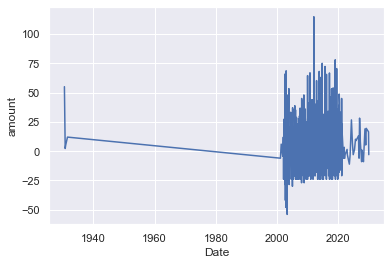

In [15]:
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.lineplot(x="Date", y="amount",data=groupbydf)

<AxesSubplot:xlabel='Date', ylabel='amount'>

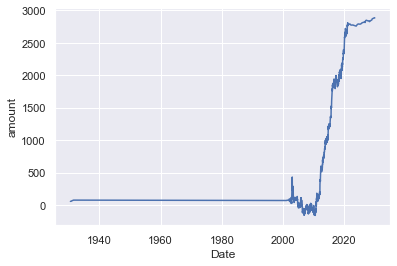

In [16]:
dfcum = df.groupby("Date").sum("amount")["amount"].cumsum(axis=0)

import seaborn as sns
sns.set_theme(style="darkgrid")

sns.lineplot(data=dfcum)

In [17]:
import numpy as np
budgetPos = np.nansum(temp)

In [18]:
budgetPos

20386.188000000002

In [19]:
budgetNeg

-17505

In [20]:
budgetPos + budgetNeg

2881.188000000002

In [21]:
df['bet'].value_counts()

A    3996
D    2002
H    1361
Name: bet, dtype: int64